In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

In [2]:
#load data
df=pd.read_excel('cobaltocenium_data_new.xlsx')
df.head()

,Unnamed: 0,Name,CoCp2 energy,CoCp name,CoCp energy,Cp name,Cp energy,BDE,Dipole moment,CoCp2 HOMO energy,...,CoCp H charge,Cp H charge,CoCp proton afinity,Cp proton afinity,proton afinity,CoCp polarizability,Cp polarizability,Hardness,dCOM,rCo-O
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,0.011840,0.01184,-1.007937,-1.007937,-1.007937,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.015190,0.01184,-0.804721,-1.007937,-0.906329,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,0.071736,0.01184,1.643441,-1.007937,0.317752,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.059590,0.01184,-0.035446,-1.007937,-0.521692,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,0.019722,0.01184,0.033120,-1.007937,-0.487409,27.96205,27.53932,-38.089250,3.328151,3.818543


In [3]:
ml_df=df.copy()

In [4]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,CoCp2 energy,CoCp name,CoCp energy,Cp name,Cp energy,BDE,Dipole moment,CoCp2 HOMO energy,CoCp2 LUMO energy,...,CoCp H charge,Cp H charge,CoCp proton afinity,Cp proton afinity,proton afinity,CoCp polarizability,Cp polarizability,Hardness,dCOM,rCo-O
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,0.011840,0.01184,-1.007937,-1.007937,-1.007937,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.015190,0.01184,-0.804721,-1.007937,-0.906329,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,0.071736,0.01184,1.643441,-1.007937,0.317752,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.059590,0.01184,-0.035446,-1.007937,-0.521692,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,0.019722,0.01184,0.033120,-1.007937,-0.487409,27.96205,27.53932,-38.089250,3.328151,3.818543


In [5]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE']<=3])
len(drop_bde)

30

In [6]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [7]:
ml_df.columns

Index(['Name', 'CoCp2 energy', 'CoCp name', 'CoCp energy', 'Cp name',
       'Cp energy', 'BDE', 'Dipole moment', 'CoCp2 HOMO energy',
       'CoCp2 LUMO energy', 'CoCp HOMO energy', 'CoCp LUMO energy',
       'Cp HOMO energy', 'Cp LUMO energy', 'CoCp H charge', 'Cp H charge',
       'CoCp proton afinity', 'Cp proton afinity', 'proton afinity',
       'CoCp polarizability', 'Cp polarizability', 'Hardness', 'dCOM',
       'rCo-O'],
      dtype='object')

In [8]:
ml_df = ml_df[ml_df['BDE']>3]
len(ml_df)

873

In [9]:
#conh2 outliers
conh2_df = ml_df[(ml_df["CoCp name"]=='(CO)NH₂')|(ml_df["Cp name"]=='(CO)NH₂')]
len(conh2_df)

42

<AxesSubplot: xlabel='CoCp proton afinity', ylabel='BDE'>

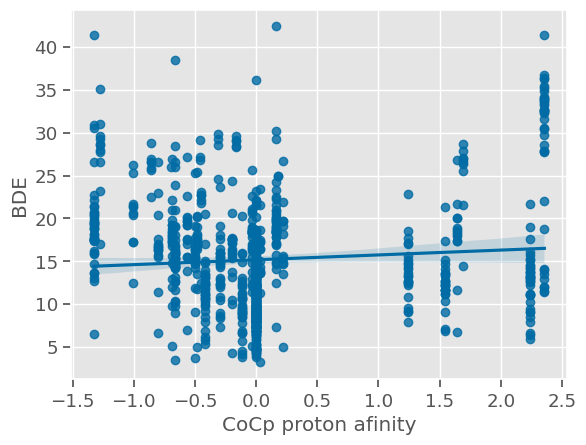

In [13]:
sns.regplot(data = ml_df, x ='CoCp proton afinity' , y = 'BDE')

In [14]:
ml_df.columns

Index(['Name', 'CoCp2 energy', 'CoCp name', 'CoCp energy', 'Cp name',
       'Cp energy', 'BDE', 'Dipole moment', 'CoCp2 HOMO energy',
       'CoCp2 LUMO energy', 'CoCp HOMO energy', 'CoCp LUMO energy',
       'Cp HOMO energy', 'Cp LUMO energy', 'CoCp H charge', 'Cp H charge',
       'CoCp proton afinity', 'Cp proton afinity', 'CoCp polarizability',
       'Cp polarizability', 'Hardness', 'dCOM', 'rCo-O'],
      dtype='object')

In [15]:
feat_cols = ['CoCp HOMO energy', 'CoCp LUMO energy',
             'Cp HOMO energy', 'Cp LUMO energy',
             'CoCp H charge', 'Cp H charge',
             'CoCp proton afinity', 'Cp proton afinity']

NameError: name 'homo_out' is not defined

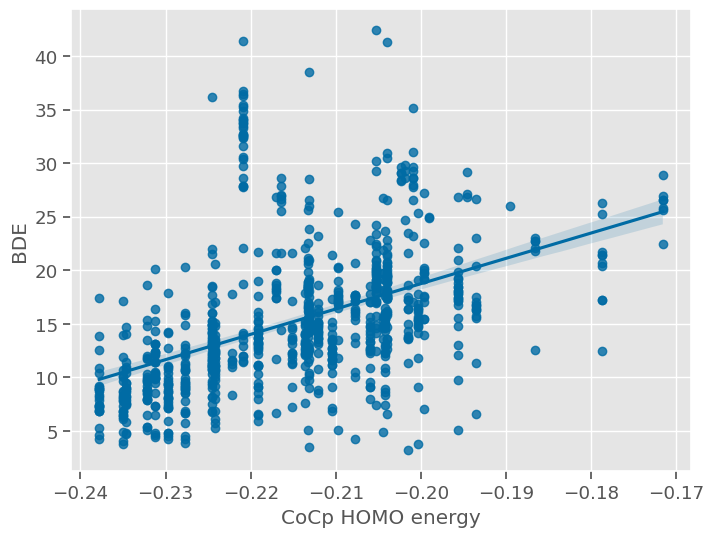

In [16]:
for i in feat_cols:
    plt.figure(figsize=(8,6))
    sns.regplot(data = ml_df, x = i , y = 'BDE')
    sns.scatterplot(data = homo_out, x = i , y = 'BDE (kcal/mol)', 
                    color = 'red', label = "-CONH$_2$ outliers")
    sns.scatterplot(data = complex_energy_out, x = i , y = 'BDE (kcal/mol)', 
                    color = 'green', label = "-CBr$_3$ outliers")
    plt.legend()
    plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')
    #plt.savefig(f'bdevs{i}.png')

In [3]:
homo_out

NameError: name 'homo_out' is not defined

In [22]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1f77b4', alpha =0.5, lw=4),
                Line2D([0], [0], color='magenta', alpha =0.7, lw=4)]


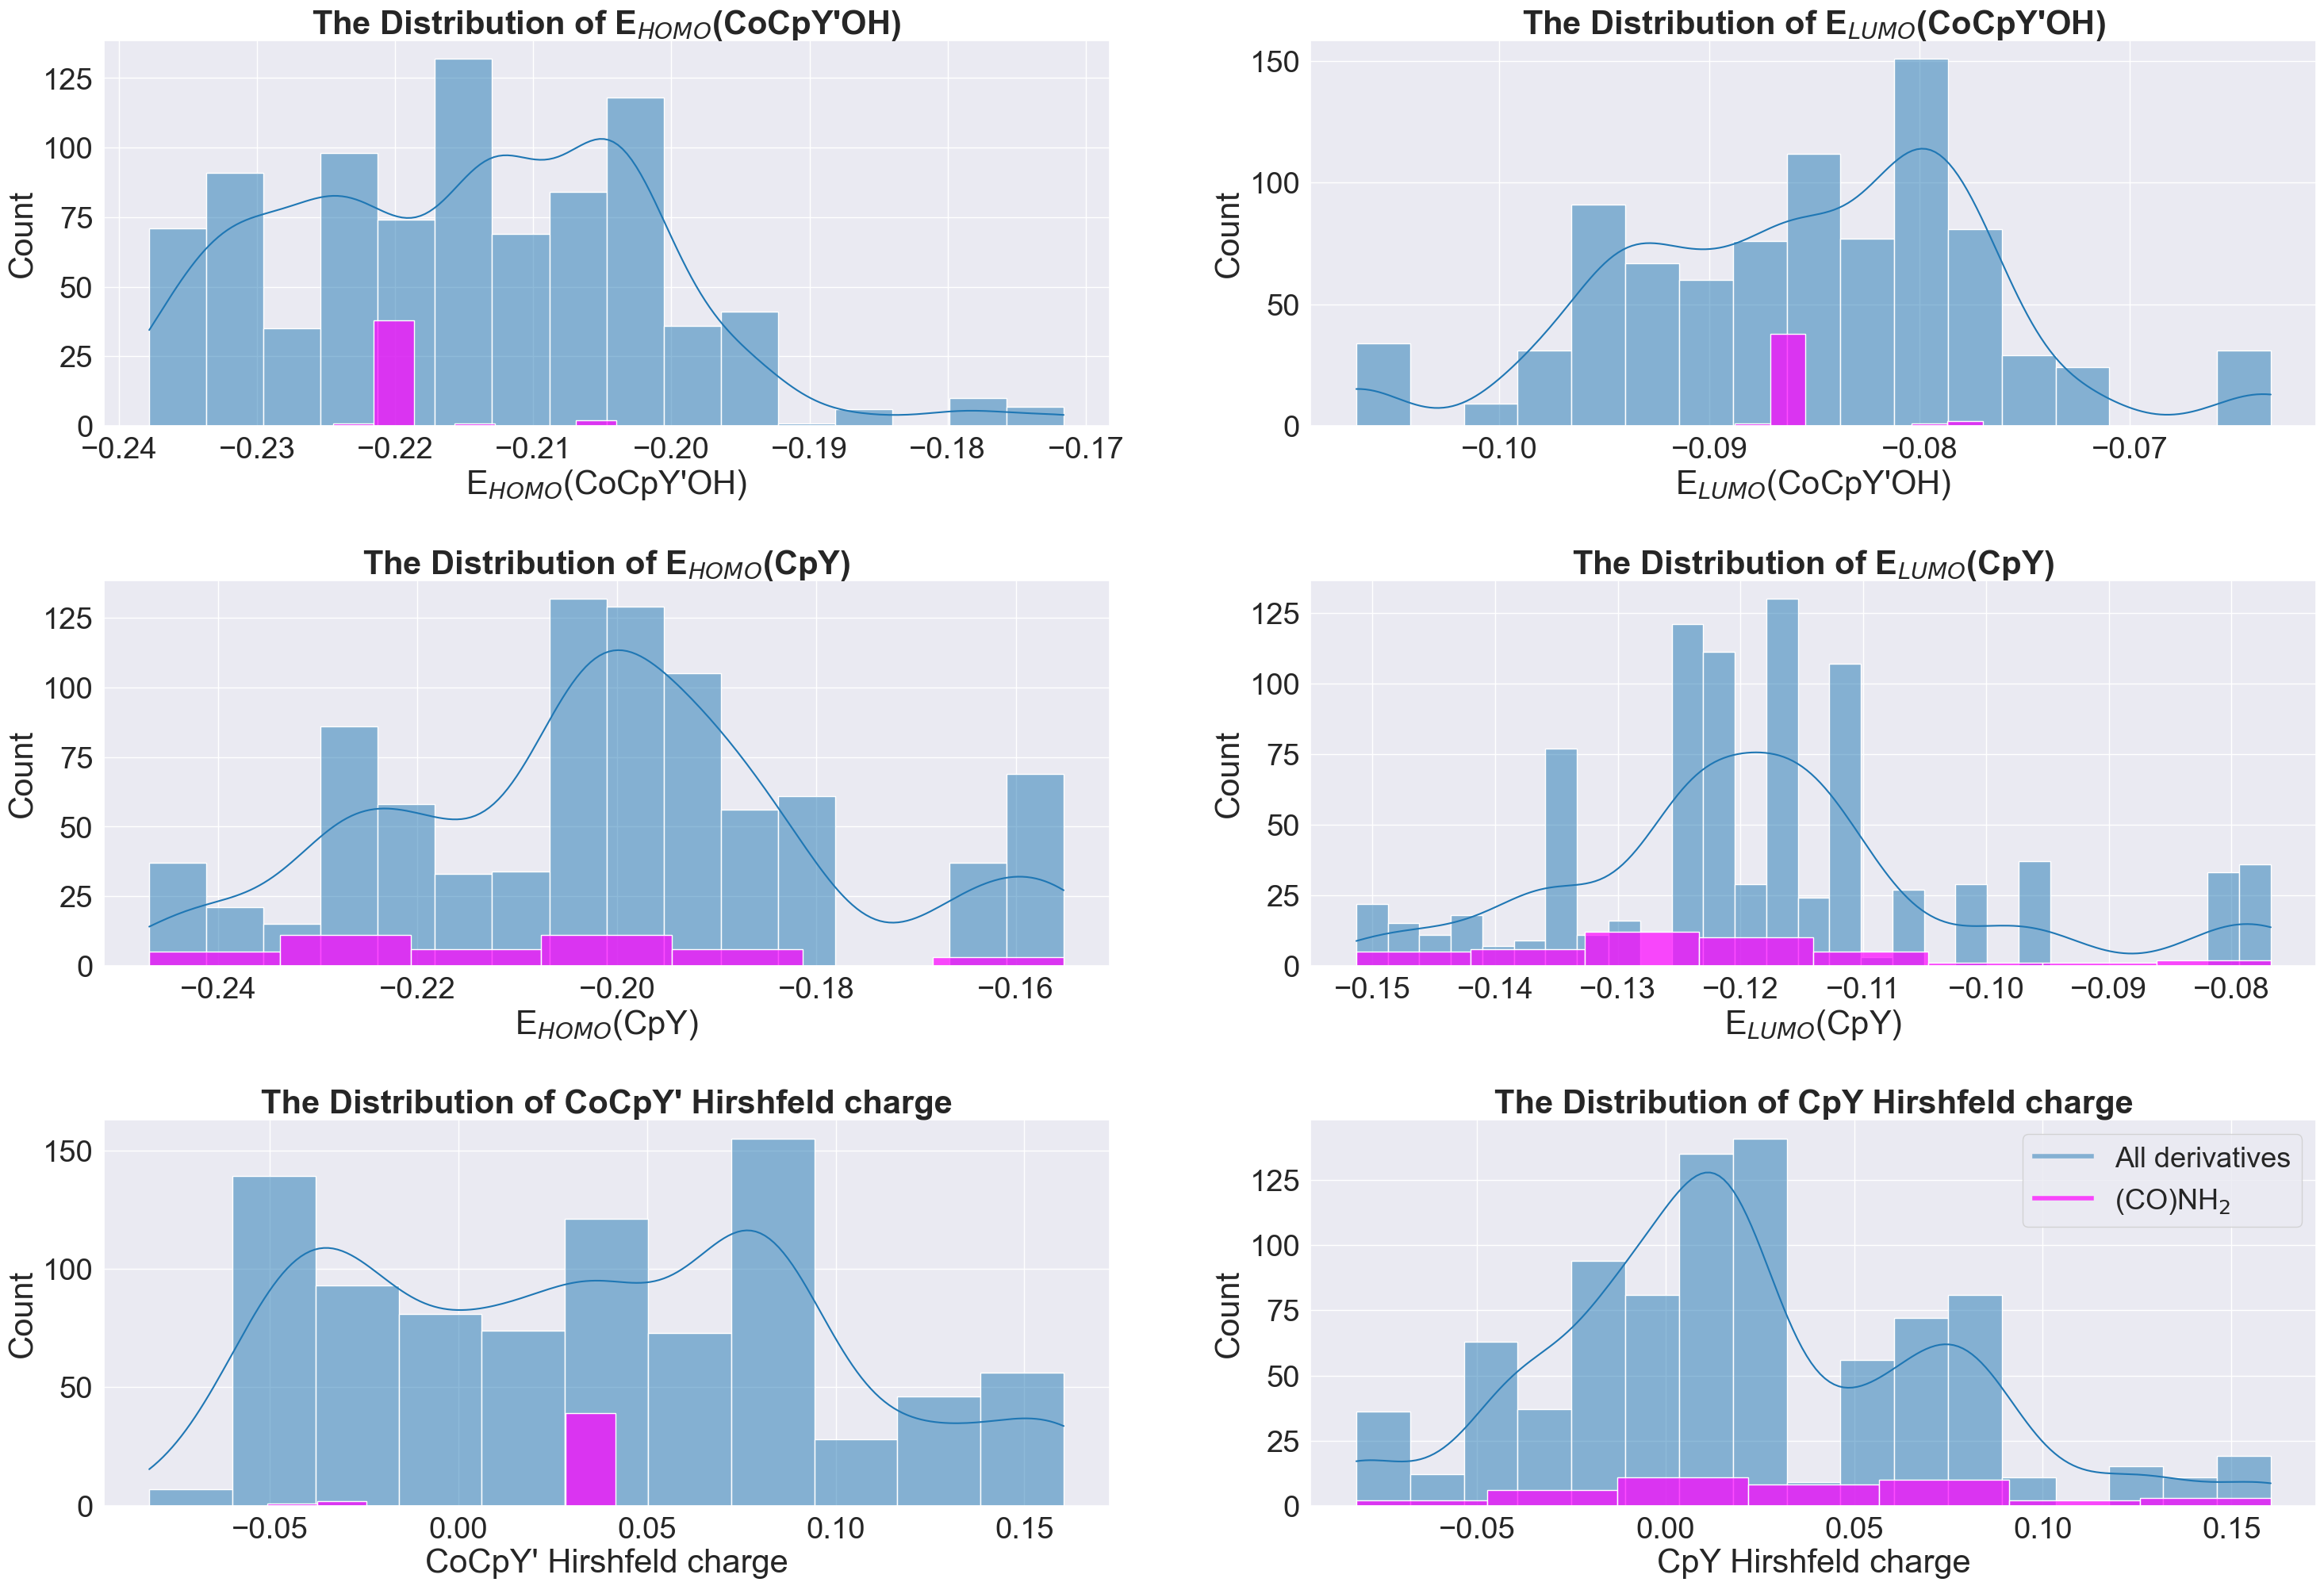

In [58]:
frag_feat_cols = ["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]
frag_feat_title = ["E$_{HOMO}$(CoCpY'OH)", "E$_{LUMO}$(CoCpY'OH)", 
              "E$_{HOMO}$(CpY)", "E$_{LUMO}$(CpY)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]
sns.set(font_scale=2.5)
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(36, 24))
fig.subplots_adjust(hspace = 0.4, wspace=0.2)
axes = axes.ravel()
plt.legend(custom_lines, ['All derivatives','(CO)NH$_2$'], bbox_to_anchor=(1,1), fontsize=26)
for i, col in enumerate(frag_feat_cols):
    #plt.figure(figsize=(8,6))

    sns.histplot(data = ml_df, x = col ,bins = 'auto', ax = axes[i], alpha = 0.5, color = '#1f77b4', kde = True)
    sns.histplot(data = conh2_df, x = col ,bins = 'auto', ax = axes[i],  color='magenta', alpha =0.7)
    axes[i].set_xlabel(frag_feat_title[i])
    axes[i].set_title(f'The Distribution of {frag_feat_title[i]}', fontweight = 'bold')
    



plt.savefig('all_feat_out.png')

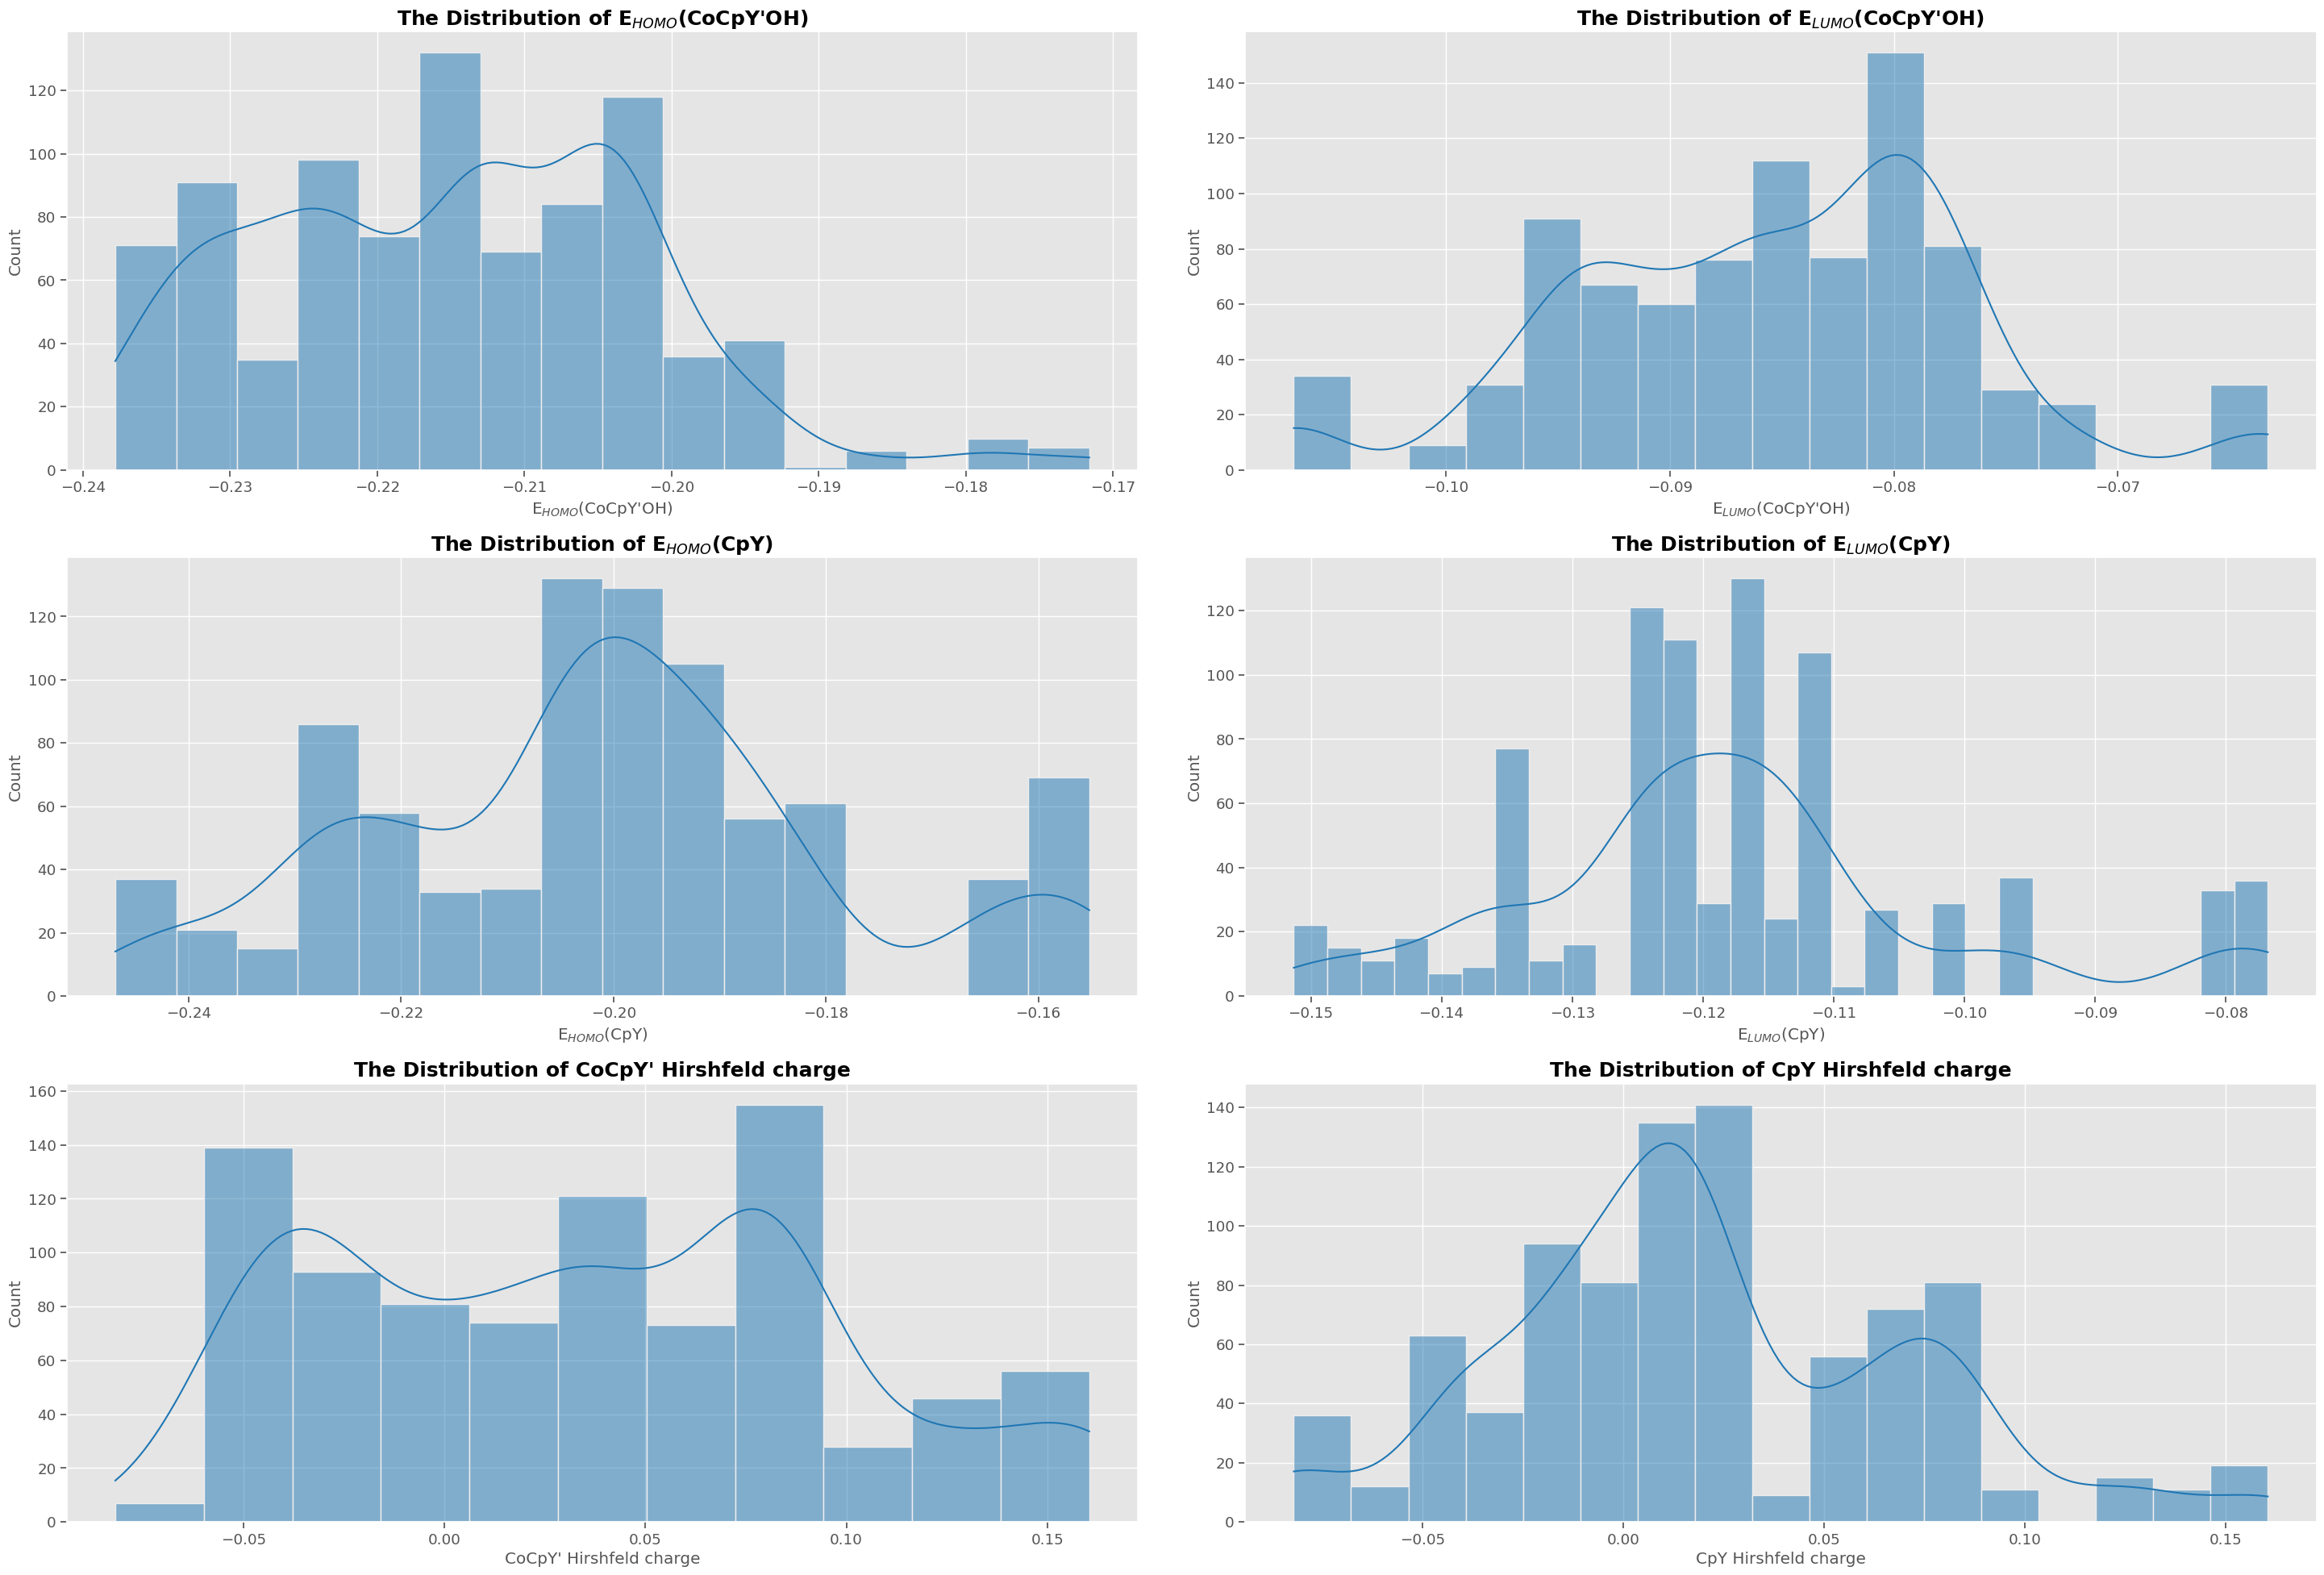

In [24]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(36, 24))
fig.subplots_adjust(hspace = 0.2, wspace=0.1)
axes = axes.ravel()
for i, col in enumerate(frag_feat_cols):
    sns.histplot(data = ml_df, x = col ,bins = 'auto', kde=True, ax = axes[i] , color = '#1f77b4' )
    axes[i].set_xlabel(frag_feat_title[i])
    axes[i].set_title(f'The Distribution of {frag_feat_title[i]}', fontsize = 18, fontweight = 'bold')
plt.savefig('all_feat.png')

In [25]:
ml_df.columns

Index(['Name', 'Co[CpY][CpY']OH energy (Eh)', 'CoCpY' name',
       'CoCpY'energy (Eh)', 'CpY name', 'CpY energy (Eh)', 'BDE (kcal/mol)',
       'Dipole moment(Debye)', 'EHOMO(Co[CpY][CpY']OH) (Eh)',
       'ELUMO(Co[CpY][CpY']OH) (Eh)', 'EHOMO(CoCpY'OH) (Eh)',
       'ELUMO(CoCpY'OH) (Eh)', 'EHOMO(CpY) (Eh)', 'ELUMO(CpY) (Eh)',
       'CoCpY' Hirshfeld charge', 'CpY Hirshfeld charge',
       'CoCpY' polarizability', 'CpY polarizability', 'Hardness (kcal/mol)',
       'dCOM (Å)', 'rCo-O (Å)'],
      dtype='object')

In [26]:
complex_feat_cols = ["Co[CpY][CpY']OH energy (Eh)","CoCpY'energy (Eh)","CpY energy (Eh)",
"BDE (kcal/mol)","EHOMO(Co[CpY][CpY']OH) (Eh)","ELUMO(Co[CpY][CpY']OH) (Eh)"  ]

complex_feat_title = ["Co[CpY][CpY']OH energy","CoCpY'energy","CpY energy",
"BDE","E$_{HOMO}$(Co[CpY][CpY']OH)","E$_{LUMO}$(Co[CpY][CpY']OH)" ]

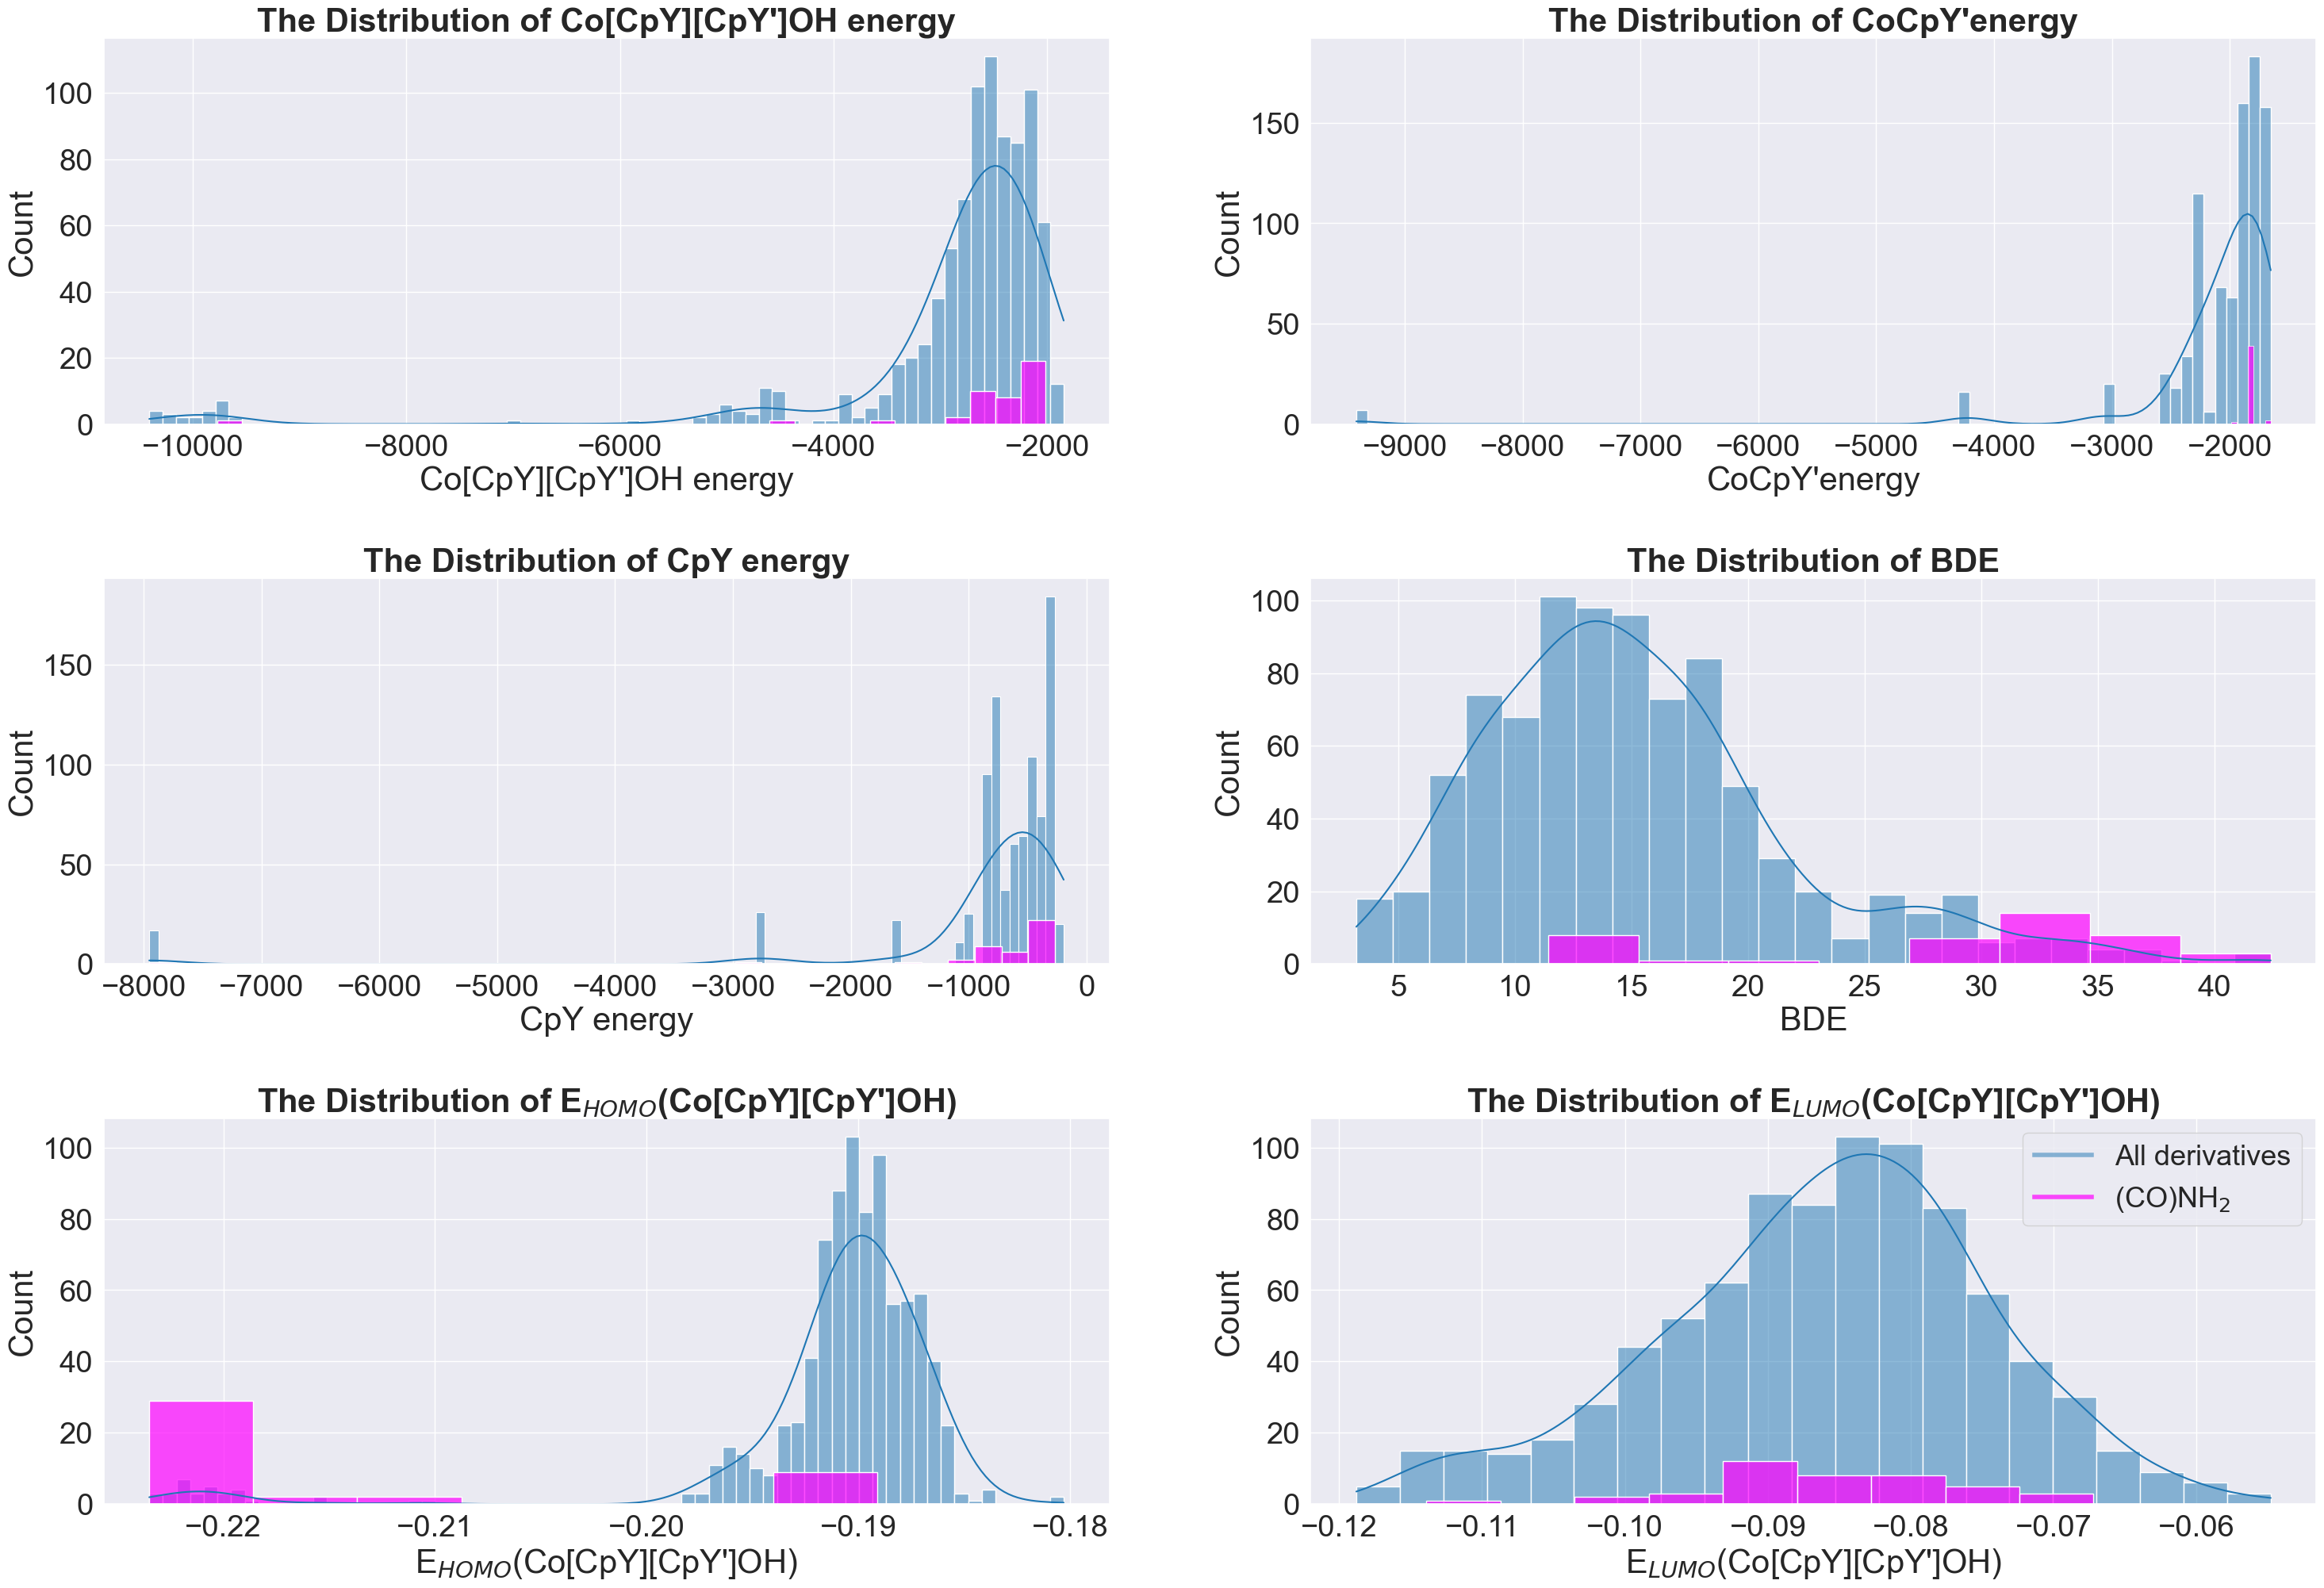

In [51]:
sns.set(font_scale=2.5)
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(36, 24))
fig.subplots_adjust(hspace = 0.4, wspace=0.2)
axes = axes.ravel()
plt.legend(custom_lines, ['All derivatives','(CO)NH$_2$'], bbox_to_anchor=(1,1), fontsize=26)
for i, col in enumerate(complex_feat_cols):
    sns.histplot(data = ml_df, x = col ,bins = 'auto', kde=True, ax = axes[i] , color = '#1f77b4' )
    sns.histplot(data = conh2_df, x = col ,bins = 'auto', ax = axes[i],  color='magenta', alpha =0.7)
    axes[i].set_xlabel(complex_feat_title[i])
    axes[i].set_title(f'The Distribution of {complex_feat_title[i]}', fontweight = 'bold')

plt.savefig('complex_feat.png')

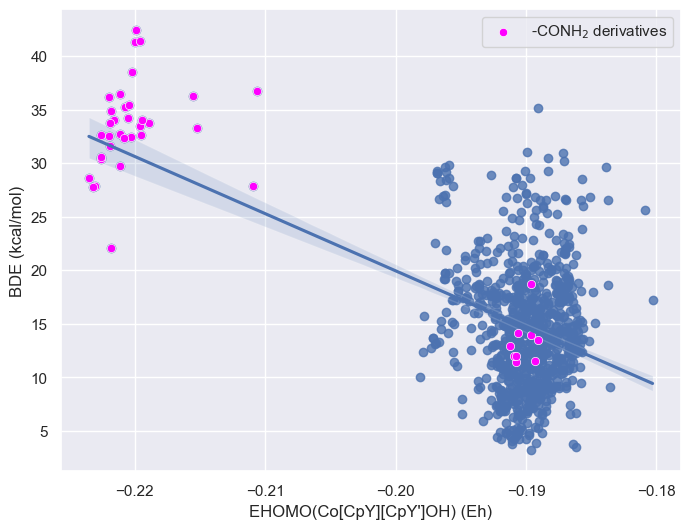

In [57]:
sns.set(font_scale=1)
plt.figure(figsize=(8,6))
sns.regplot(data = ml_df, x = "EHOMO(Co[CpY][CpY']OH) (Eh)" , y = 'BDE (kcal/mol)')
sns.scatterplot(data = conh2_df, x = "EHOMO(Co[CpY][CpY']OH) (Eh)" , y = 'BDE (kcal/mol)', 
                    color = 'magenta', label = "-CONH$_2$ derivatives")
#plt.xlabel("E$_{HOMO}$(Co[CpY][CpY']OH)")
plt.legend()
#plt.title(f'BDE Vs {i}', fontsize = 18, fontweight = 'bold')
plt.savefig('bdeVScomplexhomo.png')